# Guía 3: Condiciones de contorno en las fronteras

## Ejercicios de programación

1. Escriba un código que permita resolver numéricamente la ecuación diferencial $$u''(x) = -\frac{\pi^2}{4} (u(x) + 1)$$ en el intervalo $x = [0, 1]$ y teniendo en cuenta las condiciones de contorno $u(0) = 0$ y $u(1) = 1$.

19
0.9999994412117194 3.1377124786376953


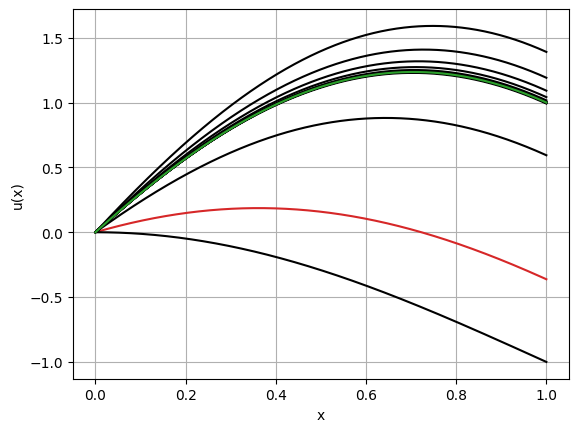

In [1]:
import matplotlib.pyplot as plt
import numpy as np

npoints = 1000
x = np.linspace(0, 1, npoints)
h = np.diff(x)[0]
tol = 1e-6

amin = -5.0
amax = 5.0

u = np.zeros(npoints)
v = np.zeros(npoints)
v[0] = 1.0
    
for i in range(0, npoints - 1):
    u[i + 1] = u[i] + h * v[i]
    v[i + 1] = v[i] - h * (np.pi**2 / 4) * (u[i] + 1)
        
plt.plot(x, u, color="tab:red", label="primer disparo")

uprev = u[-1] - 1

for j in range(1000):
    u = np.zeros(npoints)
    v = np.zeros(npoints)
    
    a = (amin + amax) / 2
    
    v[0] = a
    
    for i in range(0, npoints - 1):
        u[i + 1] = u[i] + h * v[i]
        v[i + 1] = v[i] - h * np.pi**2 * (u[i] + 1) / 4.0
    
    if uprev * (u[-1] - 1) < 0:
        amax = a
    else:
        amin = a

    if np.abs(u[-1] - 1) < tol:
        print(j)
        break
        
    plt.plot(x, u, color="k")
        
print(u[-1], a)

plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(x, u, color="tab:green", label="último disparo")
plt.grid()
plt.show()

2. Escriba un código que permita resolver numéricamente la ecuación diferencial $$u''(x) = -k^2 u(x)$$ en el intervalo $x = [0, 1]$ y teniendo en cuenta las condiciones de contorno $u(0) = 0$ y $u(1) = 0$.

15
4.413856286022977e-07 6.2831878662109375


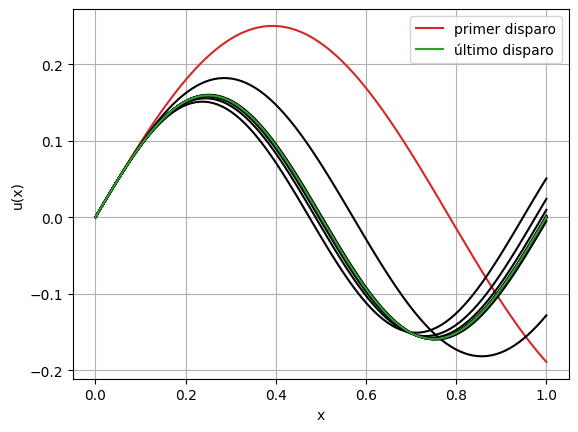

In [2]:
import matplotlib.pyplot as plt
import numpy as np

npoints = 100
x = np.linspace(0, 1, npoints)
h = np.diff(x)[0]
tol = 1e-6

k0 = 4.0
k1 = 7.0

u = np.zeros(npoints)
u[1] = h
    
k = k0

for i in range(1, npoints - 1):
    u[i + 1] = 2 * u[i] * (1 - k**2 * (5 * h**2)/12)/(1 + k**2 * (h**2)/12) - u[i - 1]
plt.plot(x, u, color="tab:red", label="primer disparo")

uprev = u[-1]

for j in range(1000):
    u = np.zeros(npoints)
    u[1] = h
    
    k = (k0 + k1) / 2

    for i in range(1, npoints - 1):
        u[i + 1] = 2 * u[i] * (1 - k**2 * (5 * h**2)/12)/(1 + k**2 * (h**2)/12) - u[i - 1]
    
    if uprev * u[-1] < 0:
        k1 = k
    else:
        k0 = k

    plt.plot(x, u, color="k")

    if np.abs(u[-1]) < tol:
        print(j)
        break
        
print(u[-1], k)
    
plt.xlabel("x")
plt.ylabel("u(x)")
plt.plot(x, u, color="tab:green", label="último disparo")
plt.legend()
plt.grid()
plt.show()